In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('insurance.csv')

### Basic Check

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Data Cleaning

In [8]:
# Missing value
print(df.isnull().values.any())

False


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### no missing value here

In [10]:
# Check duplicate values
df.duplicated().sum()

1

- duplicate = 1 values

In [11]:
# droped duplicate values
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


- numerical columns = age,bmi,children,charges.
-  categorical columns = sex,smoker,region are.

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


##### Statistical Description

- Age: Minimum = 18 ,Maximum = 64 and Mean = 39.22 
- bmi: Minimum = 15.09 ,Maximum = 53.13 and Mean = 30.66 
- children: Minimum = 0 ,Maximum is 5 and Mean  1.09 
- charges: Minimum = 1121.87 ,Maximum = 63770.42 and Mean  13279.12 

In [14]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

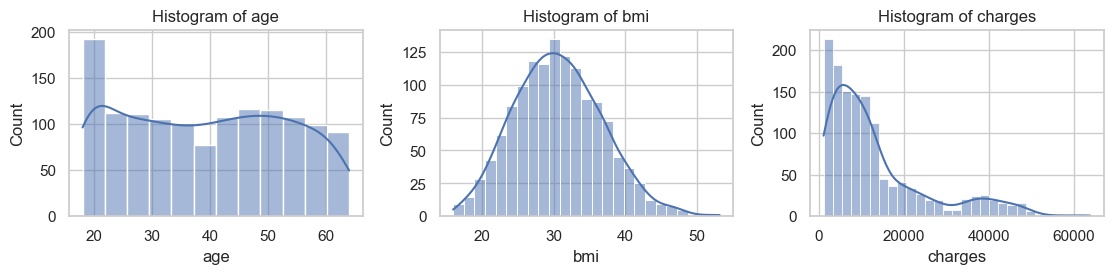

In [15]:
sns.set_theme(style="whitegrid")

ulist = ['age', 'bmi', 'charges']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.histplot(df[i], kde=True, color='b')
    plt.title('Histogram of ' + i)
    plot_num +=1
plt.tight_layout()

#### Column Insights on basis of histogram:
- Age : In age group 20 their are maximum customers where as age group of 40 has the lowest customers. And the rest of age group has a count value around 100.
- BMI : It is a slightly right skewed graph. Where most of the customers have bmi of 25 to 35. Maximum customers are found in bmi group 30.
- Charges : It is a rightly skewed graph. most of the customers have the charge value of 1120 to 15000.

### Bivariate Analysis

Text(0.5, 0, 'Smoker')

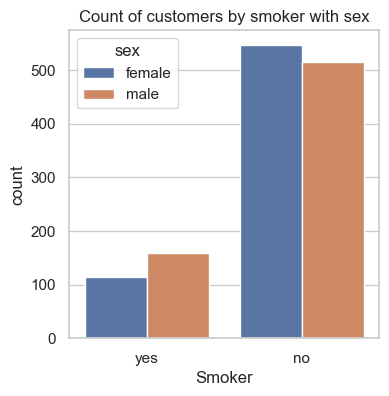

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['smoker'],hue=df.sex)
plt.title('Count of customers by smoker with sex')
plt.xlabel('Smoker')

Most of the customers do not smoke.
As compared to females there are more number of male smokers.

[Text(0.5, 0, 'age')]

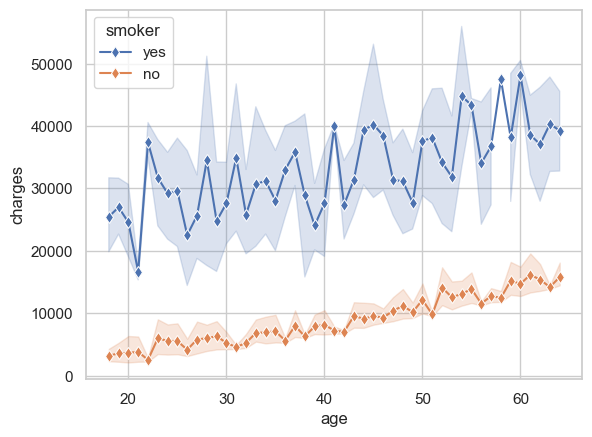

In [17]:
fig = sns.lineplot(x=df.age, y=df.charges, markevery=1, marker='d', data=df, hue=df.smoker)
fig.set(xlabel='age')

People who smokes are charged a lot higher than non-smokers.
Non-smokers are charged less than 20,000 while smokers are charged more than 15,000.

<Axes: xlabel='charges', ylabel='region'>

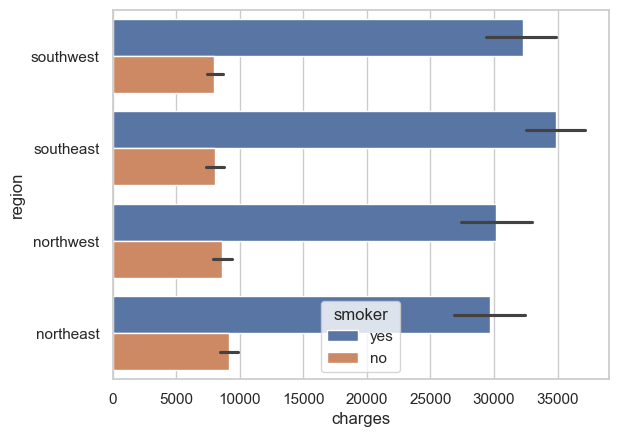

In [18]:
sns.barplot(data=df, x="charges", y="region", hue='smoker')

Smokers from southeast and non-smokers from northeast are being charged the maximum premium.

Smokers from the northeast and non-smokers from southwest are being charged the least premium.

<Axes: xlabel='charges', ylabel='bmi'>

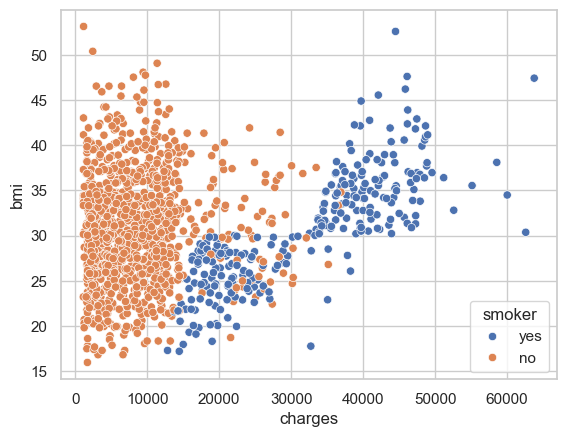

In [19]:
sns.scatterplot(x=df.charges, y=df.bmi, hue=df.smoker)

Smokers with a bmi of more than 30 are being charged more than 30,000.

Most of the non-smokers are being charged a premium of less than 15,000.

## Data Preprocessing

###  Outliers

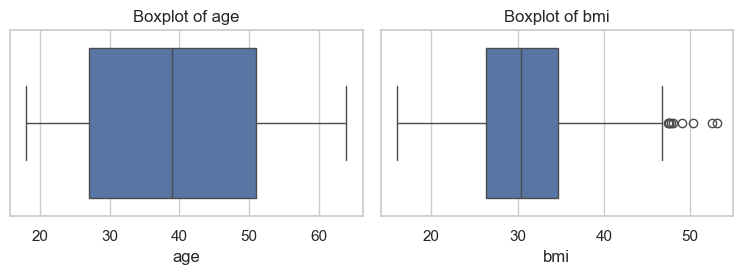

In [20]:
sns.set_theme(style="whitegrid")

ulist = ['age', 'bmi']
plot_num = 1
plt.figure(figsize=(15,10))
for i in ulist:
    ax = plt.subplot(4,4,plot_num)
    sns.boxplot(df[i], orient='h')
    plt.title('Boxplot of ' + i)
    plot_num +=1
plt.tight_layout()

- found outliers in BMI

In [21]:
print(df['bmi'].describe())

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


In [22]:
print(df['bmi'].median())

30.4


- outliers = 46

In [23]:
df.loc[df['bmi'] > 46, 'bmi'] = 30.4

## Label Encoding

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

## Feature Selection

<Axes: >

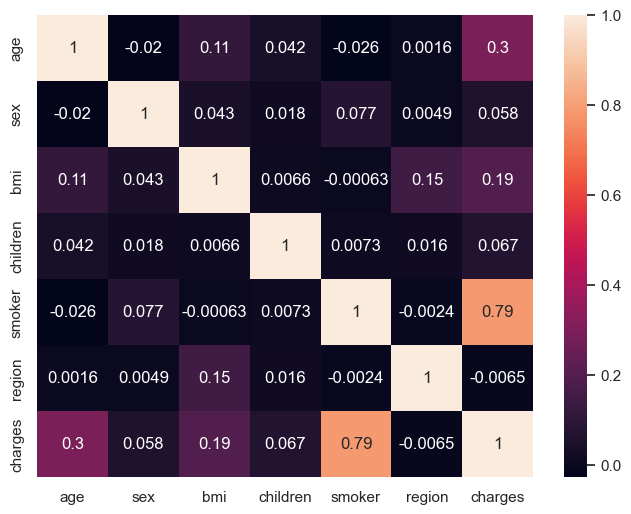

In [27]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

- Smoker and charger are highly correlated while smoker and children are least correlated.
- don't need to droped column

### Data Spliting

In [28]:
from sklearn.model_selection import train_test_split
x=df.drop('charges', axis=1)
y=df.charges
x_train, x_test, y_train, y_test = train_test_split(x,y)

- standard scaler to x_train & x_test for data normalization.

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Model Selection and Building

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_linear = r2_score(y_test, pred)

print(r2_score(y_test, pred))

6536.269333164421
0.7537730943880945


In [87]:
from xgboost import XGBRegressor
xgr=XGBRegressor()
xgr.fit(x_train, y_train)
pred = xgr.predict(x_test)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_xgbc = r2_score(y_test, pred)

print(r2_score(y_test, pred))

13675.401535492303
-0.07784373625298247


In [89]:
df.shape

(1337, 7)

In [91]:
train_adjusted_r2 = 1-(1-0.8220)*(1337-1)/(1337-7-1)
train_adjusted_r2

0.8210624529721595

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=800, max_features=None, max_leaf_nodes=6,
                      n_estimators=25)
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_random = r2_score(y_test, pred)
print(r2_score(y_test, pred))

5752.700484826978
0.8092699360235294


In [95]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[100, 200, 300, 400, 500,600,1000,1200],
             'max_depth':[5, 10,20,40,50,60, 70, 100, 200],
             'min_samples_split': [2, 3, 5,7,9, 20, 10, 30, 40],
             'min_samples_leaf': [7,10,12, 20, 40, 50,100]}

reg_rf_gscv = RandomizedSearchCV(estimator=reg_rf, param_distributions=parameters, cv=10, n_jobs=-1,)

reg_rf_gscv.fit(x_train, y_train)
print(reg_rf_gscv.best_estimator_)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=7,
                      n_estimators=400)


In [96]:
rfr = RandomForestRegressor(max_depth=50,  min_samples_leaf=20,min_samples_split=5,
                      n_estimators=1000)
rfr.fit(x_train, y_train)
pred_random = rfr.predict(x_test)
rmse_random =np.sqrt(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
r2_score_random = r2_score(y_test, pred)
print(r2_score(y_test, pred))

5752.700484826978
0.8092699360235294


In [101]:
models = ['RandomForestRegressor', 'XGBRegressor' ,'Linear Regression']
r2_score_ = [r2_score_random, r2_score_xgbc,r2_score_linear]

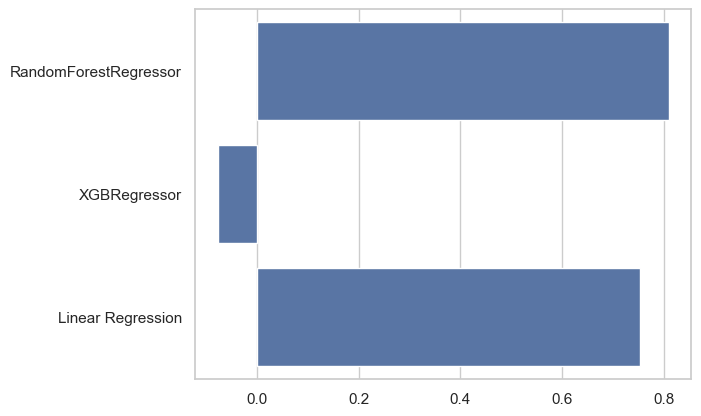

In [103]:
sns.barplot(x=r2_score_, y=models)
sns.set_theme(style="darkgrid")

- Random Forest gives us the highest r2 score than XGB & Linear Regression

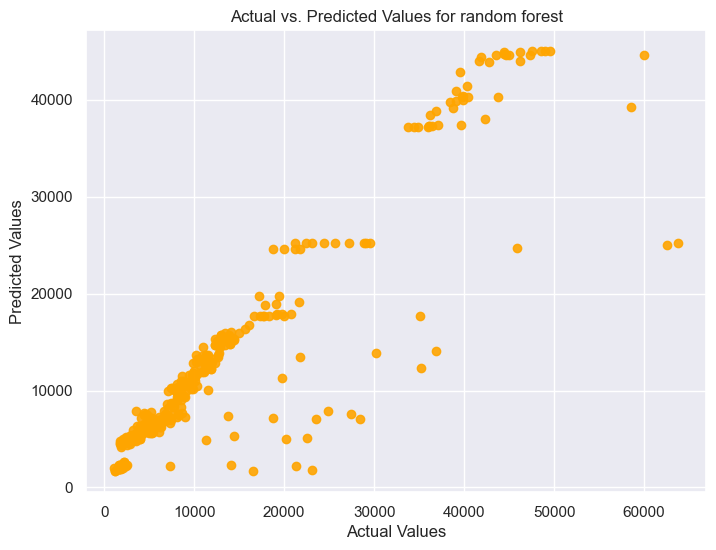

In [106]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_random, alpha=0.9, color='orange')
plt.title("Actual vs. Predicted Values for random forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [108]:
dict_new = {'mse_linear':round(rmse_linear, 2), 'mse_xgboost':round(rmse_xgboost, 2), 'mse_random':round(rmse_random, 2), 
            'r2_score_linear' : round(r2_score_linear, 2),'r2_score_xgboost' : round(r2_score_xgbc, 2), 'r2_score_random':round(r2_score_random, 2)}

In [110]:
score_df = pd.DataFrame([ dict_new.values()], columns=dict_new.keys())

## Model Evaluation

In [113]:
score_df

,mse_linear,mse_xgboost,mse_random,r2_score_linear,r2_score_xgboost,r2_score_random
0,6536.27,13675.4,5752.7,0.75,-0.08,0.81


### Conclusion

The insurance cost prediction regression model is a useful tool for risk assessment and financial planning, utilizing historical data and advanced machine learning to provide accurate premium estimates. It enhances decision-making by enabling data-driven pricing strategies, optimizing profitability, and fostering a fairer insurance market. As the model evolves, it promises improved risk management, equitable pricing, and higher customer satisfaction, shaping the future of the insurance industry.